# Zomato Data Analysis Project

# Step-1 : Importing Libraries 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step-2 : Create the Data Frame and Inspect the data

In [18]:
DataFrame = pd.read_csv(r"Zomato data .csv")

In [19]:
DataFrame

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# Convert the datatype of column - rate

In [20]:
def handle_rate(value):
    value = str(value).split("/")
    value = value[0];
    return float(value)
    
DataFrame["rate"]=DataFrame["rate"].apply(handle_rate)
print(DataFrame.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


# Summary of the DataFrame

In [21]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Conclusion: There is no NULL Value in the DataFrame, Hence we can procced with Data Visualization.

# Step-3 : Data Visualization 

# Question: What types of restaurants do the majority of customers order from?

In [22]:
DataFrame.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type Of Restaurant')

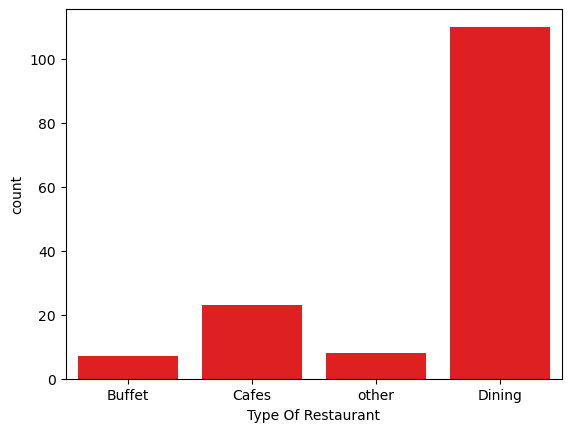

In [23]:

sns.countplot(x=DataFrame["listed_in(type)"], color="red")

plt.xlabel("Type Of Restaurant")

# Conclusion: The Majority of the restaurants falls in dinning category

# Question: How many votes has each type of restaurant received from customers?

In [24]:
DataFrame.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Votes')

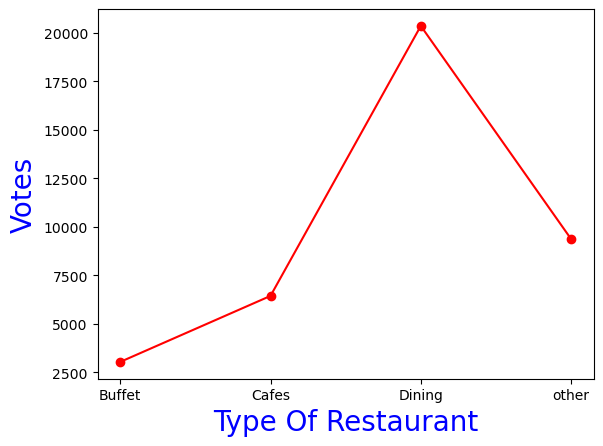

In [25]:
grouped_data = DataFrame.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes": grouped_data})
plt.plot(result, c="Red", marker="o")
plt.xlabel("Type Of Restaurant", c="Blue", size=20)
plt.ylabel("Votes", c="Blue", size=20)

# Conclusion: Dinning Restaurants are more Popular.

# Question: What are the ratings that the majority of restaurants have received?

In [26]:
DataFrame.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


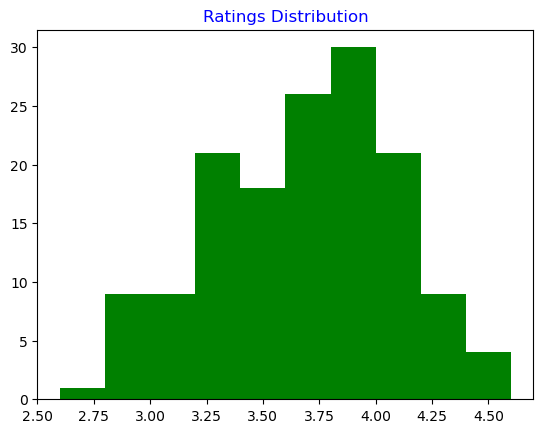

In [27]:
plt.hist(DataFrame["rate"], bins=10, color="Green")
plt.title("Ratings Distribution", color="Blue")
plt.show()

# Conclusion: The Majority Restaurants received ratings from 3.5 to 4.

# Question: Zomato has observed that most couples order most of their food online. What is their average spending on each order?

In [28]:
DataFrame.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

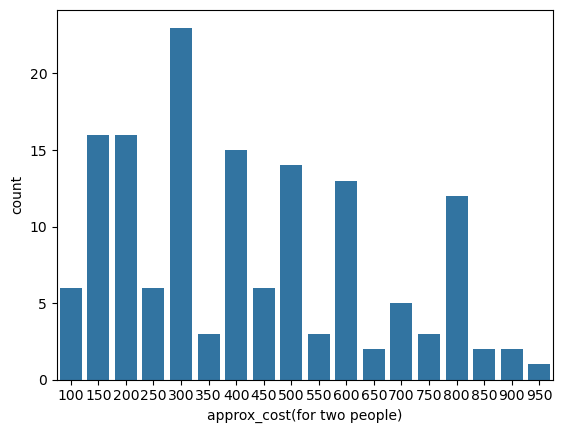

In [29]:
Couple_data = DataFrame["approx_cost(for two people)"]
sns.countplot(x=Couple_data)

# Conclusion: The Majority of Couples prefer restaurants with an approximate costs of Rs.300.

# Question: Which mode (online or offline) has received the maximum rating?

In [30]:
DataFrame.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

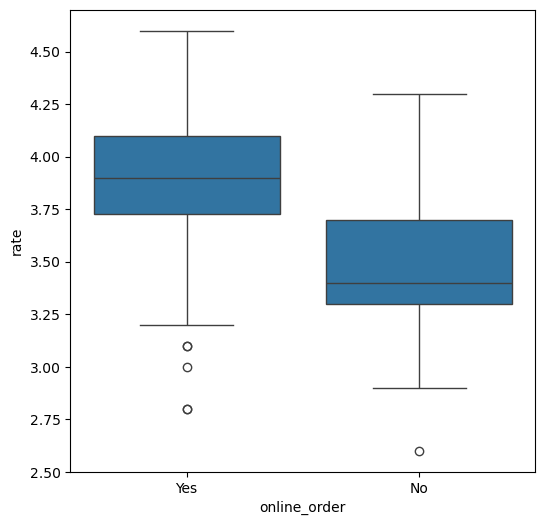

In [31]:
plt.figure(figsize = (6,6))
sns.boxplot(x = "online_order", y = "rate", data = DataFrame)

# Conclusion: Offline order received lower rating in comparison to Online Order.

# Question: Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

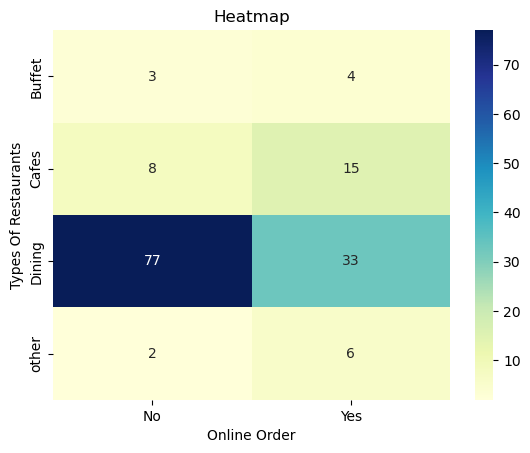

In [32]:
pivot_table = DataFrame.pivot_table(index = "listed_in(type)", columns = "online_order", aggfunc = "size", fill_value = 0)
sns.heatmap(pivot_table, annot = True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Types Of Restaurants")
plt.show()

# Conclusion: Dinning restaurants primarily accepts offline orders, whereas cafes primarily receives online orders. This suggests that client prefers to place orders in person at restaurants, but prefer online ordering at cafes.